<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/1120(%EC%9B%94)_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_4%2C_6~7_pg_87~95%2C_105~115_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1120(월) 과제_파이썬 딥러닝 텐서플로 ch3. 4, 6 ~ 7 pg. 87 ~ 95, 105 ~ 115 필사
### 2129014 박지현

# PART 03. 케라스(Keras)
- 앞에서 다룬 mnist 데이터셋 다시 사용

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('train set: ', x_train.shape, y_train.shape)

# 데이터 정규화
x_train = x_train/x_train.max()   # max: 255
x_test = x_test/x_test.max()   # max: 255

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
train set:  (60000, 28, 28) (60000,)


### 4-1. 초기값 설정
- 레이어의 초기화 방법을 다르게 설정 가능
- Dense 레이어의 기본 초기화 방법: Glorot Uniform 초기화 방법(디폴트)

In [2]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

- 기본값 GlorotUniform 초기화 방법  HeNormal로 변경하기
 - kernel_initializer 매개변수에 설정하기
  - 문자열로 지정하는 방법 / 클래스 인스턴스로 지정하는 방법

In [3]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


 - 케라스에서 지원하는 자주 사용되는 초기화 목록
  - 'glorot_normal', 'glorot_uniform': 글로럿 초기화(Xavier 초기화)
  - 'lecun_normal', 'lecun_uniform' : Yann Lecun 초기화
  - 'he_normal', 'he_uniform': He 초기화
  - 'random_normal', 'random_uniform': 정규 분포, 연속균등 분포 초기화

### 4-2. 규제(Regularization)
- 모델의 과대적합의 해소를 위해 모델을 구성하는 레이어마다 L1, L2 규제를 적용하기도 함
- 텐서플로 케라스 레이어 기본값: 규제 적용 X(디폴트: 'kernel_regularizer' : None)
 - 레이어에 규제 적용하기 위해서는 별도로 설정 필요


In [4]:
# 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

- 케라스에서 지원하는 규제: L1, L2 규제
 - 규제 적용 방법: 'kernel_regularizer'에 규제 지정하기

In [5]:
# L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


### 4-3. 드롭아웃(Dropout)
2014년 'Dropout : A simple Way to Prevent Neural Networks from Overfitting' 논문에서 제안된 아이디어
- 딥러닝 모델의 가장 큰 난제 : 과대적합 문제
 - 딥러닝 모델의 층이 넓고 깊어질 때(wide-and-deep), 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향 존재 > 검증 데이터셋/테스트 데이터셋에 대해 일반화된 성능 갖지 못하는 문제 자주 발생

- **드롭아웃** : 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어, 실무적으로 상당히 좋은 효과를 보임
 - 모든 노드가 연결되어 있지 않고 **'확률적으로' 일부의 신호를 임의로 삭제하기** > 모델이 쉽게 과대적함 되는 것 방지 가능(모델 학습 가중치 파라미터 개수가 현저하게 줄어들기 때문)
 - 모델 훈련 시 : 드롭아웃 적용되어 노드 중 일부만 훈련, But 예측 시점에는 모든 노드들이 활용됨


- 케라스에 드롭아웃 적용하기
 - Dropout 레이어 함수에 입력하는 숫자 = 노드에서 제거되는 비율

In [6]:
# Dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### 4-4. 배치 정규화(Batch Normalization)
: 각 증에서 활성화 함수를 통과하기 전 미니 배치의 스케일 정규화하기
- 다음 증으로 데이터가 전달되기 전에 스케일 조정 > 보다 안정적인 훈련 가능 + 성능을 크게 향상시킬 수 있음
- 2015년 세로게이 이오페(Sergey Ioffe)와 크리스티안 세게디(Christian Szegedy)
- 케라스 : 배치 정규화 층 클래스 함수로 지원 > 클래스 인스턴스 생성하여 추가해주면 됨
- 더 크고 복잡한 데이터셋에 대해서는 배치 정규화 유무가 모델 성능에 크게 영향을 미치는 경우도 존재 > 배치 정규화 적극 적용해볼 필요 있음


- Dense 레이어에 ReLU 활성화 함수를 추가한 모델을 model_a로 지정하여 생성하고, 배치 정규화를 적용 후 ReLU 활성화 함수 추가한 모델을 model_b에 지정하여 성능 비교해보기

In [7]:
# Model A : Dense + ReLU
model_a = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Model B: Dense + BatchNorm + ReLU
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    #  배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

- epoch 10번 동안 model_a, model_b 두 모델을 훈련한 결과
 - 배치 정규화만 추가했는데도, 손실은 이전 대비 더 안정적이고 빠르게 수렴하는 것 확인 가능

 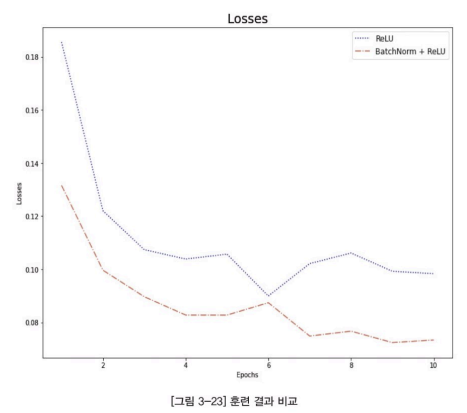

### 4-5. 활성화(activation) 함수
- ReLU 활성화 함수 뿐만 아니라 케라스가 지원하는 다른 활성화 함수 적용해볼 수 O

- 클래스 인스턴스로 활성화함수 선언하여 하이퍼파라미터 값 변경하여 적용하기

In [9]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

- LeakyReLU 모델에 적용하기

In [10]:
# Model C: Dense + BatchNorm + LeakyReLU(0,2)
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 요약
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

- 앞에서 생성한 2개의 모델 + LeakyReLU 활성화 함수로 변경한 모델까지 총 3개의 모델을 동일한 조건으로 10번의 epoch 동안 훈련한 후 수렴 속도 확인하기
 - model_a: Dense 레이어 + ReLU 활성화 함수
 - model_b: Dense 레이어 + 배치 정규화
 - model_c: Dense 레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화 함

In [11]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model A: Dense + ReLU
history_a=model_a.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model B: Dense + BatchNorm + ReLU
history_b=model_b.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model C: Dense + BatchNorm + LeakyReLU(0,2)
history_c=model_c.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2968 - accuracy: 0.9146 - val_loss: 0.1591 - val_accuracy: 0.9528
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1382 - accuracy: 0.9582 - val_loss: 0.1193 - val_accuracy: 0.9610
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0992 - accuracy: 0.9697 - val_loss: 0.0992 - val_accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0791 - accuracy: 0.9761 - val_loss: 0.0986 - val_accuracy: 0.9703
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0642 - accuracy: 0.9791 - val_loss: 0.1004 - val_accuracy: 0.9696
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0518 - accuracy: 0.9834 - val_loss: 0.1108 - val_accuracy: 0.9672
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0446 - accuracy: 0.9854 - val_loss: 0.0881 - val_accurac

- epoch별 검증 손실의 감소 추이 시각화하기
 - mnist 데이터셋 : 모델별 차이 크지 X
 - But, 좀 더 복잡한 데이터셋일 시, 배치 정규화와 다른 활성화 함수 적용해보면서 모델의 훈련 추이 관찰 필요하다!

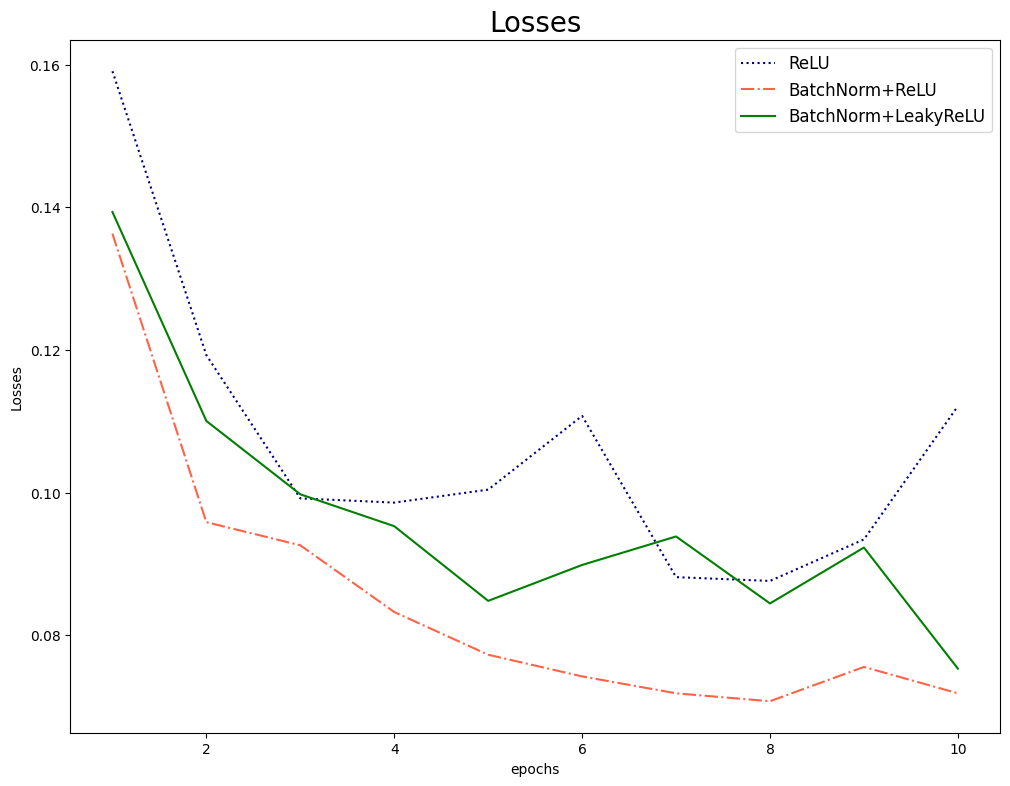

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

## PART 03.06. 모델 저장 및 불러오기
- 앞에서 사용한 mnist 데이터셋과 신경망 모델 활용하여 모델 훈련 완료된 모델을 사용함

### 6-1. 모델을 파일로 저장

In [13]:
# 모델명을 h5 포맷으로 저장
model_b.save('h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 6-2. 저장된 모델 복원

In [14]:
# 모델 복원
h5_model=tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

In [15]:
# 모델 검증 : 손실함수와 평가지표
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07186, acc: 0.97900


In [16]:
# 모델을 SavedModel 포맷으로 저장
model_b.save('saved-model')

In [17]:
# 모델 복원
saved_model=tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

In [18]:
#모델 검증 (HDF5 포맷)
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

#모델 검증 (SavedModel 포맷)
loss, acc=saved_model.evaluate(x_test, y_test, verbose= 0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07186, acc: 0.97900
saved_model] loss: 0.07186, acc: 0.97900


## PART 03.07. 복잡한 모델 생성

### 7-1. 함수형 API(Functional API)
- Sequential API 사용하는 경우 단방향의 Sequential 모델만 구현할 수 있다는 제약 존재
 - 데이터 흐름이 특정 레이어를 건너뛰거나, 병합 및 분리하는 등의 구조의 모델 구현 불가

- 기존 Sequential API로 구현한 mnist 분류기 모델을 함수형 API로 동일하게 구현하기
 - Input 레이어 정의 > 데이터의 입력 shape 정의>레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결하기
 > 여러 개의 레이어를 마치 체인 구조로 입출력을 계속 연결 가능

In [19]:
import tensorflow as tf

#모델의 레이어를 체인 구조로 연결 input 레이어 정의
input_layer=tf.keras.Input(shape=(28, 28), name='InputLayer')

#모델의 레이어를 체인 구조로 연결
x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3=tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4=tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [20]:
#모델 생성
func_model=tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


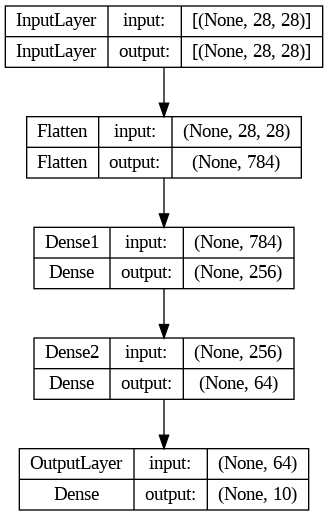

In [21]:
from tensorflow.keras.utils import plot_model

#구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [22]:
#컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs=3)

#검증
loss, acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2160 - accuracy: 0.9370
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0911 - accuracy: 0.9715
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0604 - accuracy: 0.9808
Functional Model] loss: 0.08114, acc: 0.97610


### 7-2. 모델 서브클래싱(Model Subclassing)
- 텐서플로 케라스 : Model 클래스 제공, 이를 기반으로 딥러닝 모델 구현
> 이 클래스를 직접 상속박아 사용자가 직접 서브클래스로 딥러닝 모델 생성 가능

In [23]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(256, activation='relu')
    self.dense2=tf.keras.layers.Dense(64, activation='relu')
    self.dense3=tf.keras.layers.Dense(10, activation='softmax')

  #method overiding
  #훈련용 함수 정의
  #x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

In [24]:
#모델 생성
mymodel=MyModel()

#모델의 이름 설정
mymodel._name='subclass_model'

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2150 - accuracy: 0.9366
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0886 - accuracy: 0.9722
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0597 - accuracy: 0.9810
Subclassing Model] loss: 0.08246, acc: 0.97530


### 7-3. 서브클래싱 모델 파라미터를 활용한 생성

In [26]:
class MyModel(tf.keras.Model):

  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units, activation='relu')
    self.dense2=tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes, activation='softmax')

  # class overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

In [27]:
# 모델 생성
mymodel=MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2191 - accuracy: 0.9351
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0893 - accuracy: 0.9733
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0607 - accuracy: 0.9806
Subclassing Model w.parameters] loss: 0.08376, acc: 0.97460
